Paso 1. Abre el archivo de datos y estudia la información general.

In [1]:
# 1. Abrir el archivo de datos y observar las información general
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/datasets/games.csv')

print(df.head())
print("\nInformación del DataFrame:")
df.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 1

Paso 2. Prepara los datos.

In [2]:
# 2. Preparar los datos
# 2.1. Convertir a minúsculas, quitar espacios al inicio y al final y reemplazar guiones bajos por espacios
df.columns = df.columns.str.lower().str.strip().str.replace('_', ' ')

# 2.2. Convertir 'year of release' de float a int
# Rellenar nulos con 0 para permitir la conversión a int.
df['year of release'] = df['year of release'].fillna(0).astype(int)

# 2.3. Convertir 'user score' de object a float
# Reemplazar 'tbd' por NaN para manejarlo como un valor numérico faltante
df['user score'] = df['user score'].replace('tbd', np.nan)

# 2.4. Usar pd.to_numeric para forzar la conversión.
df['user score'] = pd.to_numeric(df['user score'], errors='coerce')


# Verificar la nueva estructura del DataFrame
print("Información del DataFrame después de la conversión de tipos:")
df.info()


Información del DataFrame después de la conversión de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year of release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na sales         16715 non-null  float64
 5   eu sales         16715 non-null  float64
 6   jp sales         16715 non-null  float64
 7   other sales      16715 non-null  float64
 8   critic score     8137 non-null   float64
 9   user score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Las conversiones que se realizaron son esenciales en la fase de limpieza y preprocesamiento de datos para asegurar que las columnas tienen el tipo de dato semánticamente correcto para el análisis.

La columna year of release (año de lanzamiento) originalmente era de tipo float64, por lo tanto, un año es un número entero (por ejemplo, 1985, 2020). No existe el año 2006.5 o 1999.7.

La columna user score se cambió de object a float porque representaba valores numéricos con decimales, por lo tanto, esto permite operaciones matemáticas y los tipos object no permiten estas operaciones matemáticas de forma nativa.

Se completaron los valores ausentes (específicamente la cadena 'tbd') con np.nan para la columna user score por varias razones:

1. NaN es el estándar numérico de ausencia: Cuando trabajamos con datos numéricos en librerías como Pandas y NumPy, np.nan es el valor estándar y universalmente reconocido para representar un dato faltante o nulo.
   
2. Operaciones Seguras: Cuando se realizan cálculos estas herramientas están diseñadas para ignorar los valores NaN de forma predeterminada, evitando que causen errores o distorsionen los resultados.

3. Preservar el tipo de dato float: Originalmente, la columna user score era de tipo object debido a que contenía números y la cadena 'tbd'. Si se intentara convertir la columna a float, sin reemplazar 'tbd', el proceso habría fallado.


In [3]:
# 2.5. Calcular las ventas totales para cada juego
# Sumar las ventas regionales y almacenar el resultado en 'total sales'
df['total sales'] = df['na sales'] + df['eu sales'] + df['jp sales'] + df['other sales']

# Verificar las primeras filas para confirmar la nueva columna
print("Primeras filas del DataFrame con la nueva columna 'total sales':")
print(df.head())

Primeras filas del DataFrame con la nueva columna 'total sales':
                       name platform  year of release         genre  na sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu sales  jp sales  other sales  critic score  user score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total sales  
0   

Paso 3. Analiza los datos.

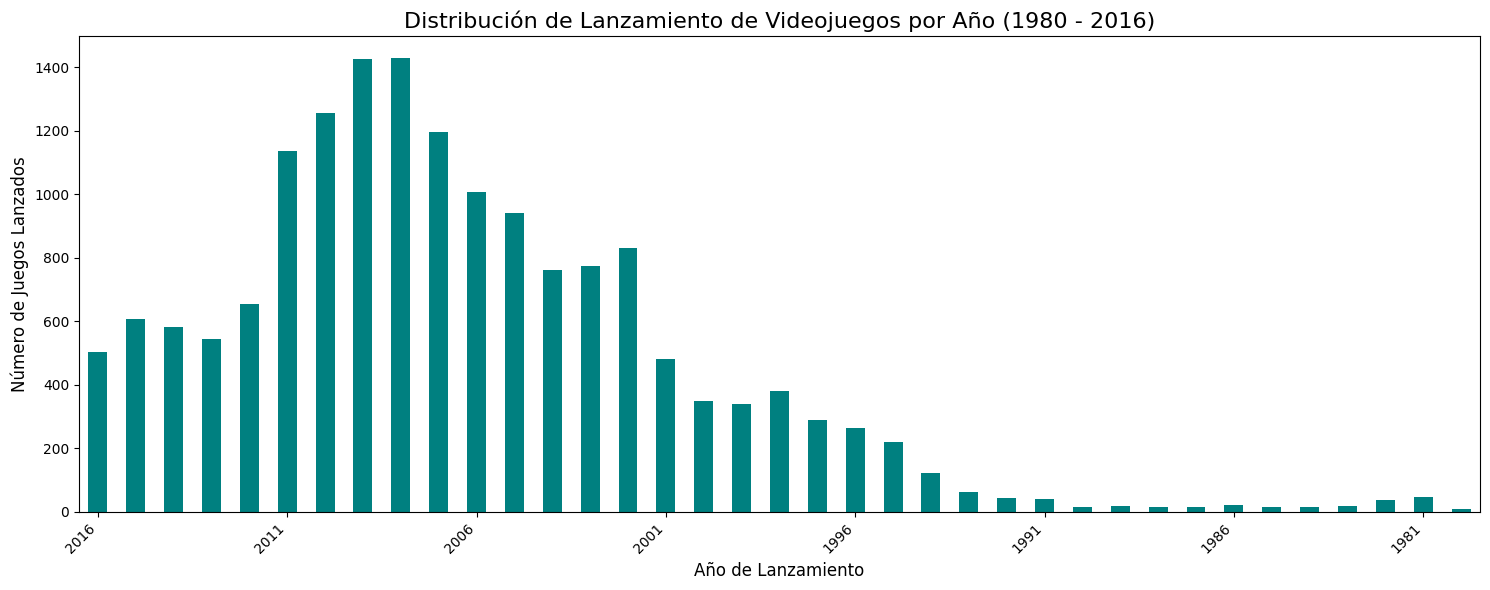

In [4]:
# 3. Analizar datos

# 3.1. Excluir los años '0' que se usaron para rellenar los valores nulos (NaN) previamente
juegos_por_año = df[df['year of release'] != 0]['year of release'].value_counts()

# Ordenar el índice de los años
juegos_por_año_ordenado = juegos_por_año.sort_index(ascending=False)

# Crear la figura y los ejes
plt.figure(figsize=(15, 6))

# Generar el gráfico de barras
juegos_por_año_ordenado.plot(kind='bar', color='teal')

# Añadir título y etiquetas
plt.title('Distribución de Lanzamiento de Videojuegos por Año (1980 - 2016)', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Juegos Lanzados', fontsize=12)

# Ajustar las etiquetas del eje X para que solo muestre cada 5 o 10 años
n_years = len(juegos_por_año_ordenado)
if n_years > 20:
    plt.xticks(rotation=45, ha='right', fontsize=10)
    tick_positions = range(0, n_years, 5)
    plt.xticks(tick_positions, juegos_por_año_ordenado.index[tick_positions])
else:
    plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

Análisis del gráfico:
Al observar el gráfico, se aprecia que entre 1980 y 1993 el número de lanzamientos de videojuegos se mantuvo relativamente constante, con pocas variaciones significativas. Este comportamiento puede asociarse a las limitaciones tecnológicas de la época y al tamaño aún reducido de la industria en esos años.

A partir de 1994 y hasta el año 2000, se identifica un crecimiento progresivo en la cantidad de lanzamientos. Esta tendencia coincide con la maduración de la industria, la expansión de consolas y PCs domésticas, y la mayor disponibilidad de herramientas de desarrollo. Aunque el internet comenzó a abrirse al público en 1991 y se popularizó hacia 1994–1995, su impacto directo en el desarrollo de videojuegos aún era limitado; sin embargo, sí contribuyó a impulsar el mercado global y la distribución de información.

Entre 2001 y 2007 se observa un incremento más marcado en la producción anual de videojuegos. Este aumento puede relacionarse con la llegada de nuevas generaciones de consolas, motores gráficos más accesibles y la creciente profesionalización del sector, lo cual redujo tiempos de desarrollo y facilitó la creación de más títulos.

En los años 2008 y 2009 el gráfico registra picos notables, indicando que estos fueron los periodos con mayor número de lanzamientos. Posteriormente, a partir de 2010 a 2011, se aprecia una disminución, tendencia que se acentúa entre 2012 y 2016, donde los lanzamientos bajan de forma considerable.
Si bien diversas causas podrían explicar este descenso, es importante señalar que no pueden inferirse directamente del gráfico. Entre las posibles explicaciones se incluyen:

1. Cambios en los modelos de negocio (transición hacia juegos digitales, free-to-play o móviles).

2. Mayor enfoque en producir títulos de mayor escala y calidad, lo que incrementa tiempos de desarrollo.

3. Consolidación de estudios y reducción de proyectos simultáneos.

Estas razones son consistentes con las tendencias reportadas en la industria durante esos años, pero no pueden confirmarse únicamente a partir de la visualización.

Conclusión:

El análisis del gráfico muestra una evolución clara en la producción de videojuegos: un crecimiento moderado en los años iniciales, seguido por una expansión acelerada a partir de mediados de los noventa y un pico alrededor de 2008–2009. Posteriormente, la tendencia se invierte con una reducción sostenida de lanzamientos.
Estos patrones reflejan la transformación tecnológica, económica y organizacional de la industria, en la que factores como la complejidad de los desarrollos, los modelos de negocio y la profesionalización del sector influyen de manera significativa en la cantidad de títulos publicados cada año.

In [5]:
# 3.2. Elegir las primeras 4 plataformas líderes en ventas totales

# Agrupar por 'platform' y sumar las 'total sales'
ventas_por_plataforma = df.groupby('platform')['total sales'].sum()

# Ordenar los resultados en orden descendente
ventas_por_plataforma_ordenadas = ventas_por_plataforma.sort_values(ascending=False)

# Seleccionar las 4 primeras plataformas
top_4_plataformas = ventas_por_plataforma_ordenadas.head(4)

# Mostrar el resultado
print("Top 4 Plataformas con Mayor Número de Ventas Totales (en millones):")
print(top_4_plataformas)


Top 4 Plataformas con Mayor Número de Ventas Totales (en millones):
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
Name: total sales, dtype: float64


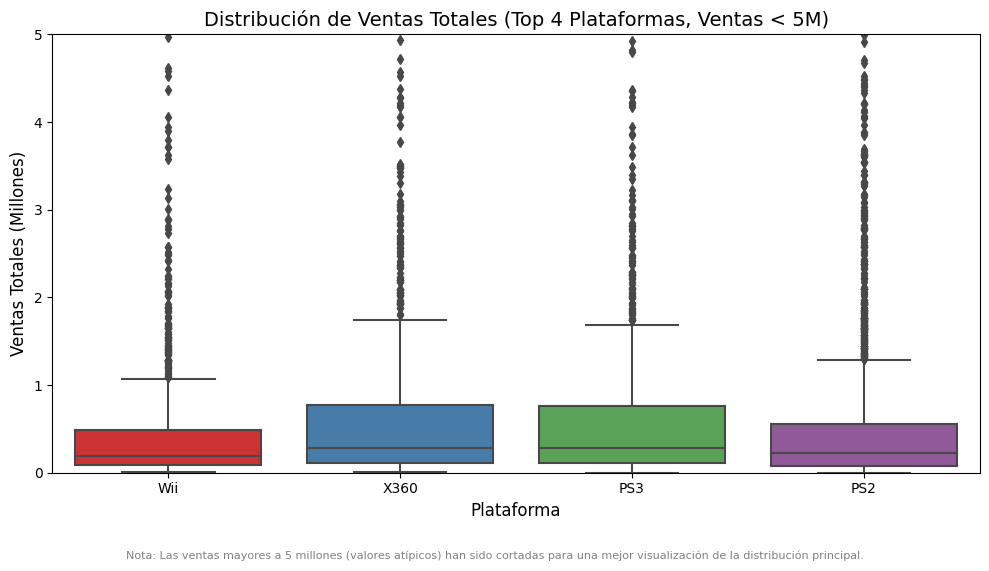

In [6]:
# 3.3. Definir la lista de las plataformas más vendidas
top_plataformas = ['PS2', 'X360', 'PS3', 'Wii']

# Filtrar el DataFrame para incluir solo el Top 4
df_top_4 = df[df['platform'].isin(top_plataformas)].copy()

# Filtrar también los años nulos (0) si el análisis es sensible al tiempo
df_top_4 = df_top_4[df_top_4['year of release'] != 0]

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total sales', data=df_top_4, palette='Set1')
y_limit_max = 5
plt.ylim(0, y_limit_max) 

# Añadir título y etiquetas
plt.title(f'Distribución de Ventas Totales (Top 4 Plataformas, Ventas < {y_limit_max}M)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (Millones)', fontsize=12)

# Añadir una nota al pie de página
plt.figtext(0.5, 0.01, f"Nota: Las ventas mayores a {y_limit_max} millones (valores atípicos) han sido cortadas para una mejor visualización de la distribución principal.",
            wrap=True, horizontalalignment='center', fontsize=8, color='gray')


# Mostrar el gráfico
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Análisis del gráfico:
El gráfico de cajas y bigotes presentado muestra la distribución de las ventas totales de videojuegos, limitadas a 5 millones de unidades, para las cuatro plataformas con las mayores ventas acumuladas en la historia: Wii, X360 (Xbox 360), PS3 (PlayStation 3) y PS2 (PlayStation 2). Este análisis nos permite inferir patrones en la rentabilidad de los juegos para cada consola, más allá de sus ventas totales agregadas.

1.- Ventas Medias (Medianas):
Wii y PS2 exhiben las medianas (línea central dentro de la caja) más bajas, indicando que la mayoría de sus juegos individuales tuvieron ventas más modestas.
X360 y PS3 presentan medianas ligeramente más altas, sugiriendo que, en promedio, sus títulos generaron un poco más de ventas que los de Wii y PS2.

2.- Dispersión y Consistencia (Rango Intercuartílico - IQR):
Las cajas de todas las plataformas son relativamente estrechas y cortas, lo que implica que el 50% central de los juegos (entre el primer y tercer cuartil) para estas consolas tienen distribuciones de ventas bastante concentradas y no muy elevadas. La mayoría de los juegos no alcanzan ventas masivas.
X360 parece tener una caja ligeramente más extendida hacia arriba que Wii, indicando quizás una mayor variabilidad en las ventas dentro de su segmento central, pero sigue siendo contenida.

3.- Rango de Ventas Típicas (Bigotes):
Los bigotes superiores para todas las plataformas se extienden a valores de ventas por debajo de los 2 millones (e incluso por debajo de 1.5 millones para Wii y PS2), lo que refuerza la idea de que la gran mayoría de los juegos no son mega-éxitos.
La distribución es fuertemente asimétrica positiva, con la masa de los datos concentrada en valores bajos. Esto es típico de las ventas de productos, donde solo unos pocos títulos logran ventas excepcionalmente altas.

4.- Presencia de Outliers (Valores Atípicos):
A pesar de haber limitado el eje Y a 5 millones, se observa una significativa cantidad de puntos fuera de los bigotes (outliers) para todas las plataformas, especialmente PS2, X360 y PS3. Estos puntos representan los juegos que lograron ventas considerablemente más altas que la mayoría en su respectiva plataforma.
Los outliers por encima de los 5 millones, que fueron recortados en este gráfico para mejorar la legibilidad de la distribución principal, serían los verdaderos "best-sellers" de cada plataforma (los títulos que contribuyeron fuertemente a las ventas totales agregadas de cada consola).

Conclusión:
El gráfico confirma que, aunque estas plataformas generaron el mayor volumen de ventas totales acumuladas, la gran mayoría de sus juegos individuales tuvieron ventas modestas (por debajo de 1 millón). Las ventas totales se vieron impulsadas por un número relativamente pequeño de títulos (outliers).

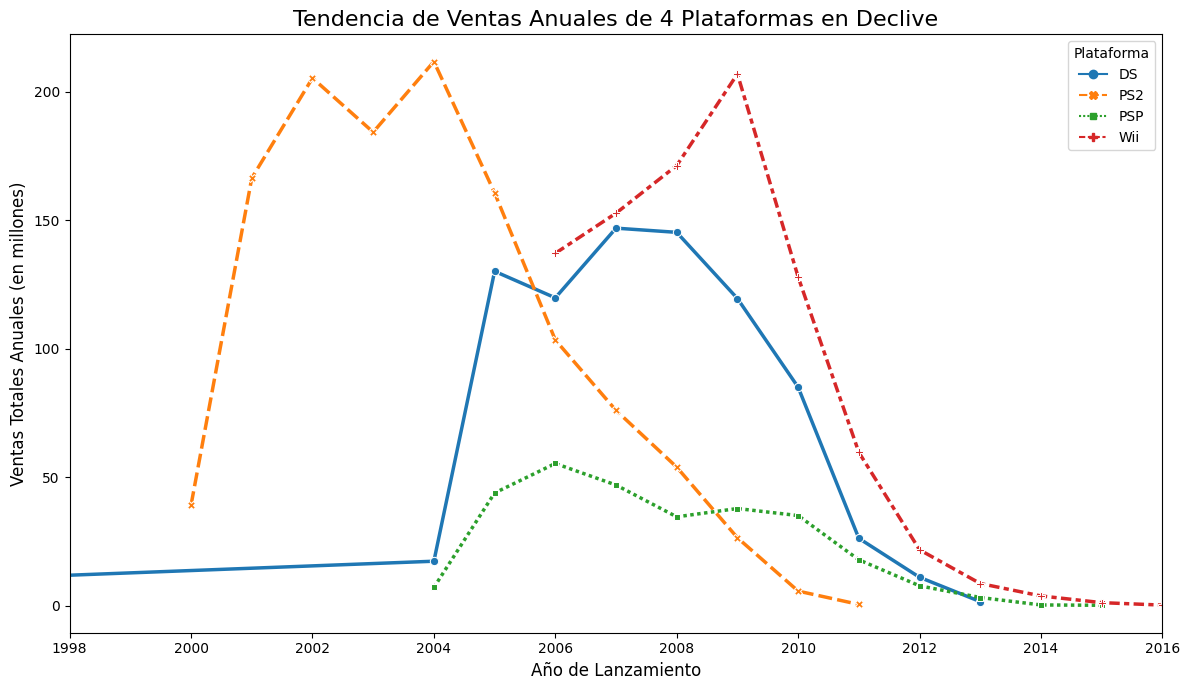

In [7]:
#3.4. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas.

# Definir las 4 plataformas que muestran un claro declive
plataformas_en_declive = ['PS2', 'Wii', 'PSP', 'DS']

# Agrupar ventas anuales por plataforma
ventas_anuales_plataforma = df[df['year of release'] != 0].groupby(['year of release', 'platform'])['total sales'].sum().reset_index()

# Filtrar los datos anuales solo para las plataformas en declive
df_declive = ventas_anuales_plataforma[ventas_anuales_plataforma['platform'].isin(plataformas_en_declive)]

# Crear el gráfico de línea
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_declive, x='year of release', y='total sales', hue='platform', linewidth=2.5, style='platform', markers=True)
plt.title('Tendencia de Ventas Anuales de 4 Plataformas en Declive', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales Anuales (en millones)', fontsize=12)
plt.xlim(1998, 2016)
plt.legend(title='Plataforma', loc='upper right')

plt.tight_layout()
plt.show()

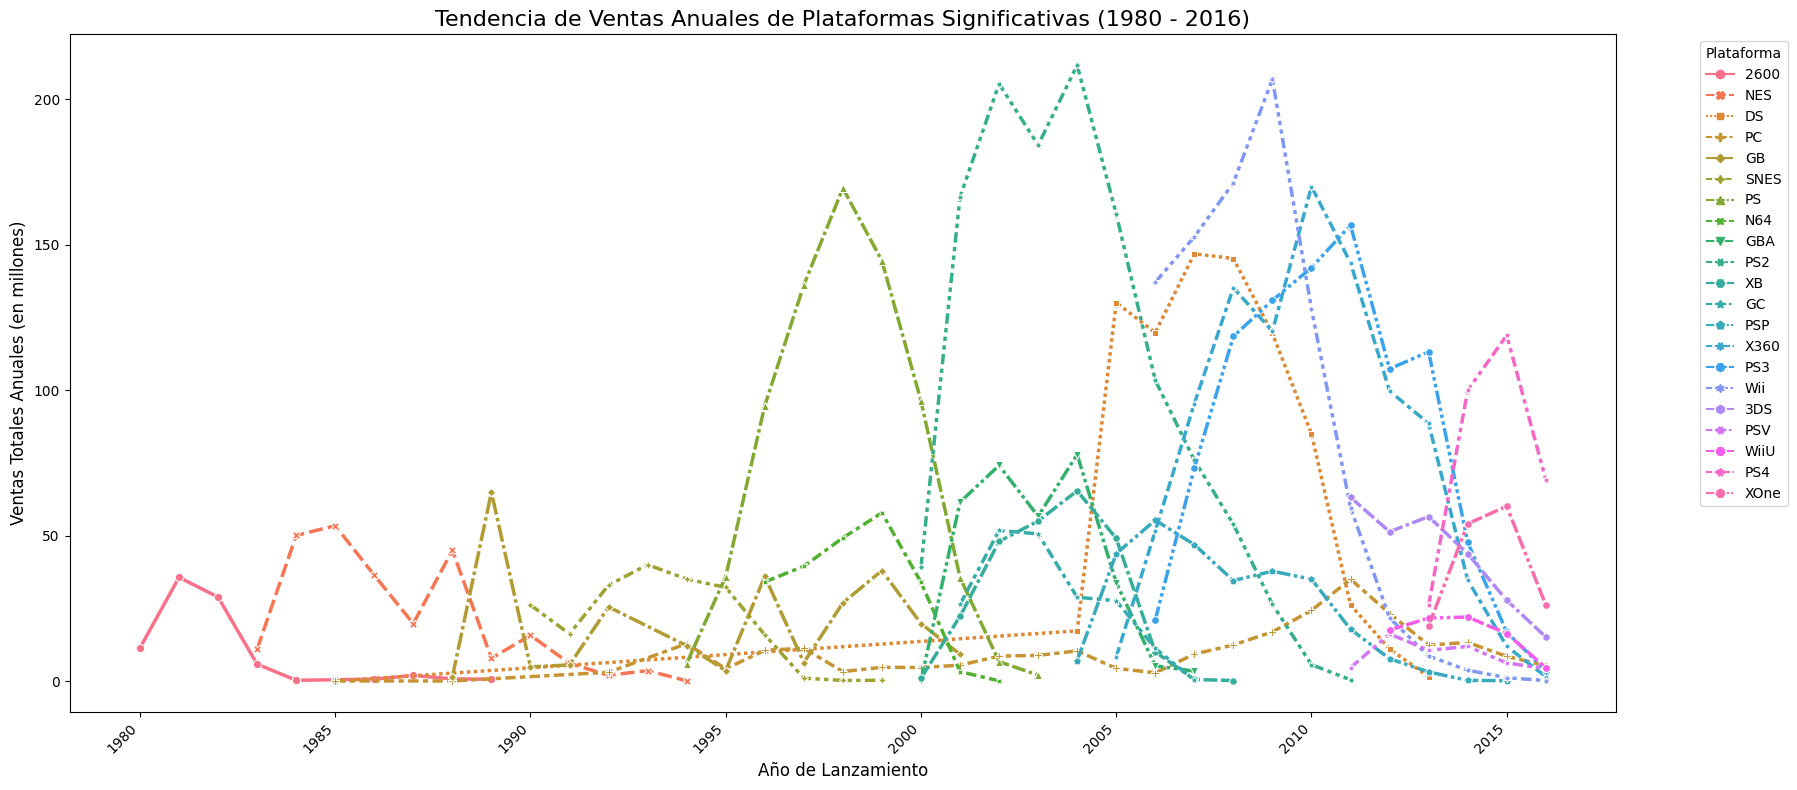

In [8]:
#3.5. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas.

# Agrupar por 'year of release' y 'platform' y sumar 'total sales' y excluir el año 0 (nulos)
ventas_anuales_plataforma = df[df['year of release'] != 0].groupby(['year of release', 'platform'])['total sales'].sum().reset_index()

# Identificar las plataformas más importantes para incluir en el gráfico
# Filtrar aquellas cuya venta total acumulada sea superior a 50 millones
ventas_acumuladas = df.groupby('platform')['total sales'].sum()
plataformas_significativas = ventas_acumuladas[ventas_acumuladas > 50].index.tolist()

# Filtrar los datos anuales solo para las plataformas significativas
df_tendencia = ventas_anuales_plataforma[ventas_anuales_plataforma['platform'].isin(plataformas_significativas)]

# Crear el gráfico de línea
plt.figure(figsize=(18, 8))

# Trazar múltiples líneas, una para cada plataforma
sns.lineplot(data=df_tendencia, x='year of release', y='total sales',hue='platform', linewidth=2.5,style='platform', markers=True)

# Añadir título y etiquetas
plt.title('Tendencia de Ventas Anuales de Plataformas Significativas (1980 - 2016)', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales Anuales (en millones)', fontsize=12)
plt.xticks(range(ventas_anuales_plataforma['year of release'].min(), ventas_anuales_plataforma['year of release'].max() + 1, 5), rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

El gráfico de tendencia de ventas anuales proporciona una visión empírica sobre la duración de los ciclos de vida de las consolas, permitiendo estimar el tiempo que tardan las nuevas plataformas en establecerse y las antiguas en desaparecer del mercado de lanzamientos minoristas.

1. Duración del Ciclo de Vida (Aparición y Declive)
El análisis del gráfico confirma que el ciclo de vida de las plataformas de consolas (como PS2, Wii, X360, etc.) se caracteriza por un periodo de crecimiento (auge) seguido de un declive pronunciado.

Aparición y Auge: Las nuevas plataformas tardan un promedio de 5 a 8 años en alcanzar su máximo rendimiento de ventas de software antes de que el mercado empiece a migrar a la siguiente generación. Las líneas (PS3, X360, Wii) muestran un crecimiento sostenido desde su lanzamiento hasta alcanzar su pico máximo de ventas anuales.

Declive y Desaparición: El periodo de ventas significativas de las plataformas antiguas, tras alcanzar su pico, tiene una duración menor, de 4 a 6 años, antes de que las ventas caigan a niveles marginales. Por ejemplo, las líneas de plataformas como DS y PSP muestran una caída abrupta y rápida después de 2010, evidenciando su obsolescencia en el dataset.

2. El Caso Atípico de la Plataforma PC
Ventas Constantes y Bajas: A diferencia de las consolas que muestran picos agudos (indicando ciclos de lanzamiento y reemplazo), la línea de PC se mantiene relativamente constante y con un volumen de ventas históricamente más bajo en este dataset (el cual puede no capturar completamente las ventas digitales modernas).

Razón del Fenómeno: La PC no sigue un ciclo de vida de generación porque no es un hardware cerrado. Es una plataforma de arquitectura abierta y retrocompatible, lo que le permite actualizar sus componentes de forma modular y continua.

En conclusión, mientras que las consolas mas nuevas operan bajo ciclos de vida finitos de aproximadamente 7 a 10 años, la PC se mantiene como una plataforma base constante debido a su naturaleza modular. Este contraste define dos modelos de mercado distintos dentro de la industria de los videojuegos.

In [9]:
# 3.6. Identificar las 5 plataformas líderes en ventas (filtradas por Años 2005-2016)

# Filtrar el DataFrame por el rango de años
df_filtrado_reciente = df[(df['year of release'] >= 2005) & (df['year of release'] <= 2016)].copy()

# Agrupar por 'platform' y sumar las 'total sales' del DataFrame filtrado
ventas_por_plataforma_reciente = df_filtrado_reciente.groupby('platform')['total sales'].sum()

# Paso 3: Ordenar los resultados en orden descendente y seleccionar el Top 5
top_5_plataformas_recientes = ventas_por_plataforma_reciente.sort_values(ascending=False).head(5)

# Mostrar el resultado
print("Top 5 Plataformas Líderes en Ventas Totales (2005-2016, en millones):")
print(top_5_plataformas_recientes)

Top 5 Plataformas Líderes en Ventas Totales (2005-2016, en millones):
platform
X360    961.24
PS3     931.34
Wii     891.18
DS      785.49
PS2     426.46
Name: total sales, dtype: float64


Se determinó que se tomarían las plataformas (X360, PS3, Wii, DS, PS2) líderes en ventas a partir del año 2005 hasta el 2016 y se ignorarían los datos de años ateriores para así poder crear modelos predictivos y tratar de anticipar las ventas del para el año 20017 

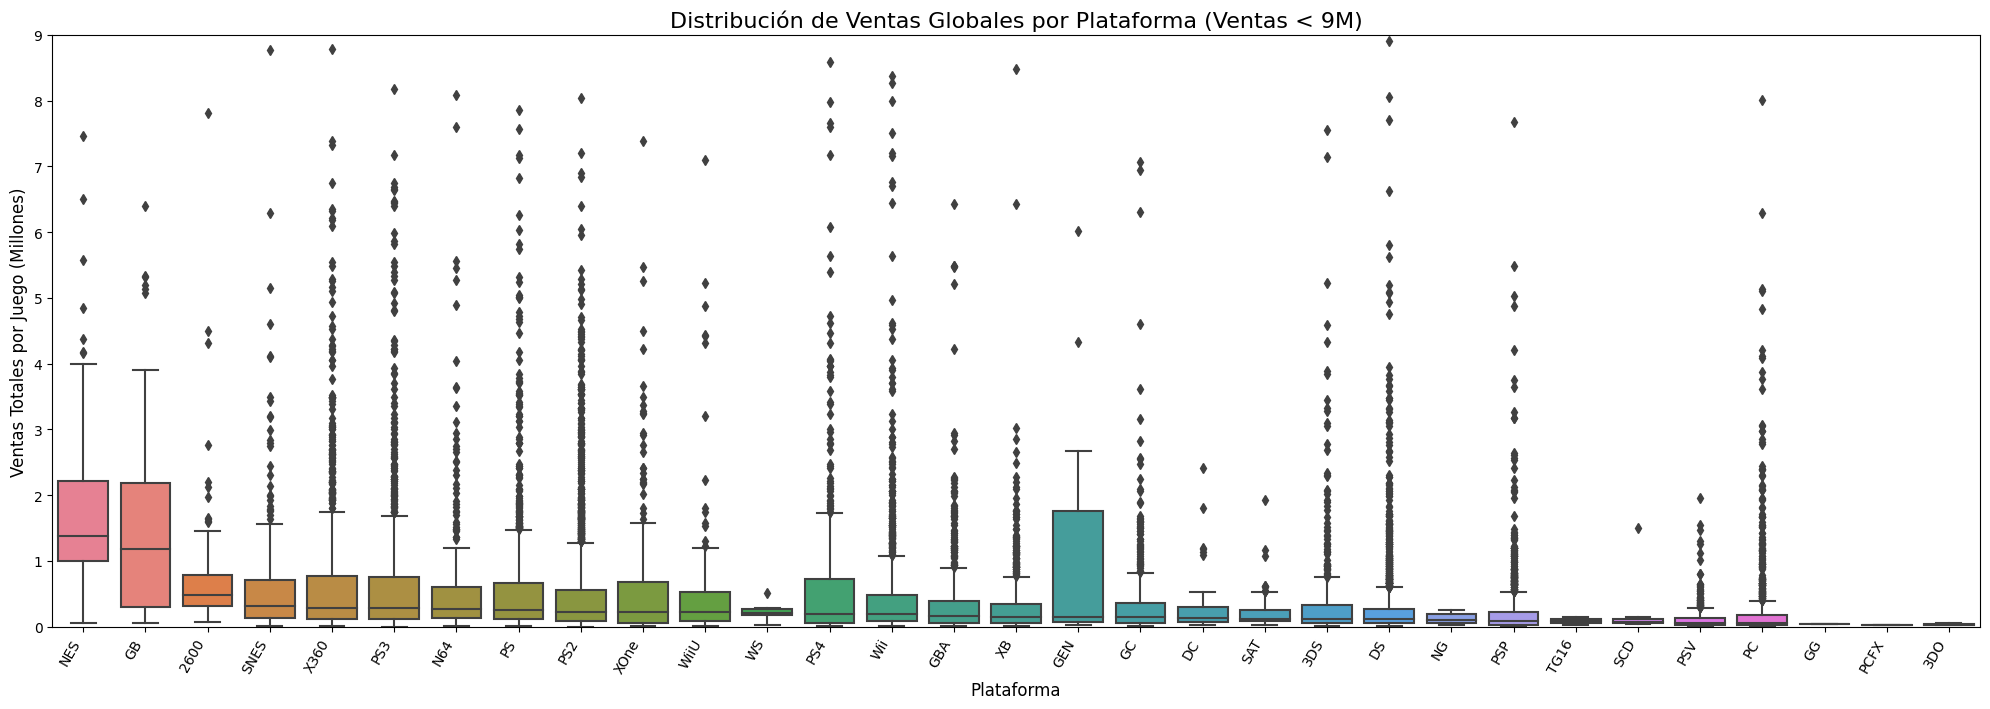

In [10]:
# 3.7. Crea un diagrama de caja para las ventas globales de todos los juegos

df_limpio = df[(df['year of release'] != 0) & (df['total sales'].notnull())].copy()

# Ordenar las plataformas por la mediana de sus ventas totales
medianas_ventas = df_limpio.groupby('platform')['total sales'].median().sort_values(ascending=False)
plataformas_ordenadas = medianas_ventas.index

# Crear diagrama
plt.figure(figsize=(20, 8))
sns.boxplot(x='platform', y='total sales', data=df_limpio, palette='husl', order=plataformas_ordenadas)

# Ajuste del Límite del Eje Y
y_limit_max = 9
plt.ylim(0, y_limit_max)

# Añadir título y etiquetas
plt.title(f'Distribución de Ventas Globales por Plataforma (Ventas < {y_limit_max}M)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales por Juego (Millones)', fontsize=12)
plt.xticks(rotation=60, ha='right')


# Mostrar el gráfico
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

1. ¿Son significativas las diferencias en las ventas?
Sí, las diferencias en la distribución central de las ventas (ventas más comunes por juego) entre las plataformas son altamente significativas, especialmente al comparar las plataformas históricamente más exitosas con el resto:
Diferencias de Mediana: La línea central de la caja varía drásticamente. Plataformas como Wii, NES, GB, DS y las consolas de la época del boom inicial muestran las medianas más altas (alrededor de 0.8 a 1.2 millones), lo que implica que el 50% de sus juegos superaron ese umbral de ventas. Esto sugiere que, históricamente, el juego promedio en estas plataformas tenía un mejor rendimiento de ventas base.
En contraste, plataformas más modernas o de nicho (PC, PSP, PSV, SAT) tienen medianas muy cercanas a 0.0 o 0.1 millones. Esto significa que la mayoría de los juegos lanzados para estas consolas vendieron menos de 100,000 unidades.

Diferencias en el Rango Intercuartil (IQR): El tamaño de la caja (IQR, que contiene el 50% central de los datos) también varía:
Plataformas como Wii y NES tienen cajas visiblemente más grandes y están ubicadas en un rango de ventas más alto, lo que demuestra una mayor variabilidad en las ventas, pero con un rendimiento base superior.Las plataformas con medianas bajas no solo tienen la mediana cerca de cero, sino que sus cajas son extremadamente planas y pequeñas, indicando que las ventas del 50% central de sus juegos están muy concentradas en un rango muy bajo.


2. ¿Qué sucede con las ventas promedio en varias plataformas?
El gráfico de caja y bigotes no muestra la media, sino la mediana (el valor central). La mediana es una métrica más robusta porque no se ve afectada por los valores atípicos (los best-sellers extremos).

Lo que se observa de las ventas medianas es lo siguiente:
Plataformas Líderes en Distribución: Las plataformas que tienen las medianas más altas son Wii, NES, GB y DS. Esto sugiere que la rentabilidad base (el rendimiento del juego promedio) fue históricamente más alta en estas plataformas, impulsadas a menudo por títulos first-party de gran éxito y una amplia base instalada.

Plataformas Altamente Sesgadas: Para casi todas las plataformas, la distribución es extremadamente sesgada hacia la derecha (asimétrica positiva). La mayoría de las ventas se concentra en el extremo inferior, y los outliers (los pocos juegos que superan el límite de 2.0M) son los que realmente impulsarían la media hacia arriba. Si se calculara el promedio simple, plataformas con pocos outliers extremos (como Wii Sports o Super Mario Bros.) tendrían un promedio mucho más alto que su mediana, evidenciando que el éxito está concentrado en una minoría de títulos.

Coeficientes de Correlación (Pearson) con Ventas Totales
Crítico (Critic Score) vs. Ventas: 0.256
Usuario (User Score) vs. Ventas: 0.098


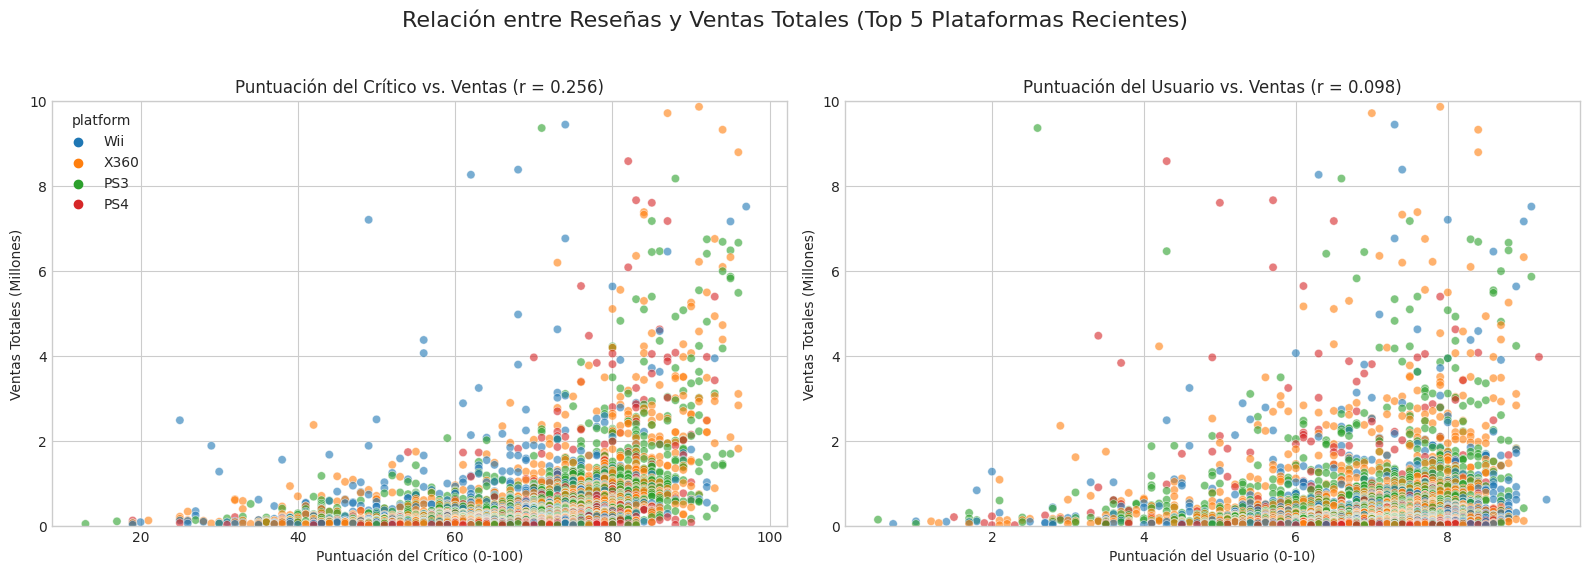

In [11]:
# 3.8. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular

# Definir el Top 4 de plataformas recientes
top_4_plataformas_recientes = ['X360', 'PS3', 'Wii', 'PS4'] 

# Filtrar el DataFrame: solo el Top 4 de plataformas y solo filas con datos de puntuación y ventas
df_puntuacion = df[(df['platform'].isin(top_4_plataformas_recientes)) & (df['critic score'].notnull()) & (df['user score'].notnull()) & (df['total sales'].notnull())].copy()

print("Coeficientes de Correlación (Pearson) con Ventas Totales")

# Correlación entre Puntuación del Crítico y Ventas
corr_critic = df_puntuacion['critic score'].corr(df_puntuacion['total sales'])
print(f"Crítico (Critic Score) vs. Ventas: {corr_critic:.3f}")

# Correlación entre Puntuación del Usuario y Ventas
corr_user = df_puntuacion['user score'].corr(df_puntuacion['total sales'])
print(f"Usuario (User Score) vs. Ventas: {corr_user:.3f}")

# Crear gráficos de dispersión
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relación entre Reseñas y Ventas Totales (Top 5 Plataformas Recientes)', fontsize=16)

# Gráfico de Dispersión: Critic Score vs. Total Sales
sns.scatterplot(
    ax=axes[0],
    x='critic score',
    y='total sales',
    data=df_puntuacion,
    hue='platform',
    alpha=0.6)
axes[0].set_title(f'Puntuación del Crítico vs. Ventas (r = {corr_critic:.3f})')
axes[0].set_xlabel('Puntuación del Crítico (0-100)')
axes[0].set_ylabel('Ventas Totales (Millones)')
axes[0].set_ylim(0, 10) 

# Gráfico de Dispersión: User Score vs. Total Sales
sns.scatterplot(ax=axes[1], x='user score', y='total sales', data=df_puntuacion, hue='platform', alpha=0.6, legend=False)
axes[1].set_title(f'Puntuación del Usuario vs. Ventas (r = {corr_user:.3f})')
axes[1].set_xlabel('Puntuación del Usuario (0-10)')
axes[1].set_ylabel('Ventas Totales (Millones)')
axes[1].set_ylim(0, 10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis de correlación de Pearson revela que existe una relación positiva, pero débil a muy débil, entre las puntuaciones de calidad del juego y las ventas totales generadas.

1. Correlación del Crítico vs. Ventas Coeficiente (r): 0.256
   Análisis: Este valor indica una correlación positiva débil entre la puntuación del crítico y las ventas. Aunque la relación es débil, es
   la más fuerte de las dos. Esto sugiere que, en el mercado de las plataformas recientes, las reseñas profesionales tienen cierta
   influencia: a mayor puntuación crítica, tiende a haber un ligero aumento en las ventas, pero la calidad por sí sola no es el factor
   dominante del éxito comercial.

2. Correlación del Usuario vs. Ventas Coeficiente (r): 0.098
   Análisis: Este valor es muy cercano a cero, indicando una correlación positiva muy débil o insignificante entre la puntuación del usuario
   y las ventas. El éxito comercial no parece depender fuertemente de la opinión promedio de los usuarios.

Implicaciones y conclusiones:

1. Influencia de la Crítica (Marketing): La puntuación del crítico (r=0.256) es casi dos veces y media más fuerte como predictor de ventas
   que la puntuación del usuario. Esto puede deberse a que las reseñas de la prensa especializada a menudo se publican justo antes del
   lanzamiento y son utilizadas en las campañas de marketing, afectando las decisiones de compra iniciales.

2. Las Ventas son Multifactoriales: El hecho de que ambos coeficientes sean bajos (ambos por debajo de 0.3) implica que la mayor parte de la
   variación en las ventas se explica por otros factores, y no por la calidad promedio medida por las reseñas. Estos factores incluyen:
   - Marketing y Publicidad
   - Franquicia o Marca
   - Disponibilidad en el lanzamiento
   - Demanda de hardware

3. Rentabilidad Desligada de la Opinión Masiva: Aunque un juego sea excelente (puntuaciones altas), no garantiza que sea un best-seller. Por
   el contrario, un juego con puntuaciones promedio puede alcanzar grandes ventas si se beneficia de una fuerte franquicia o una campaña
   publicitaria masiva.

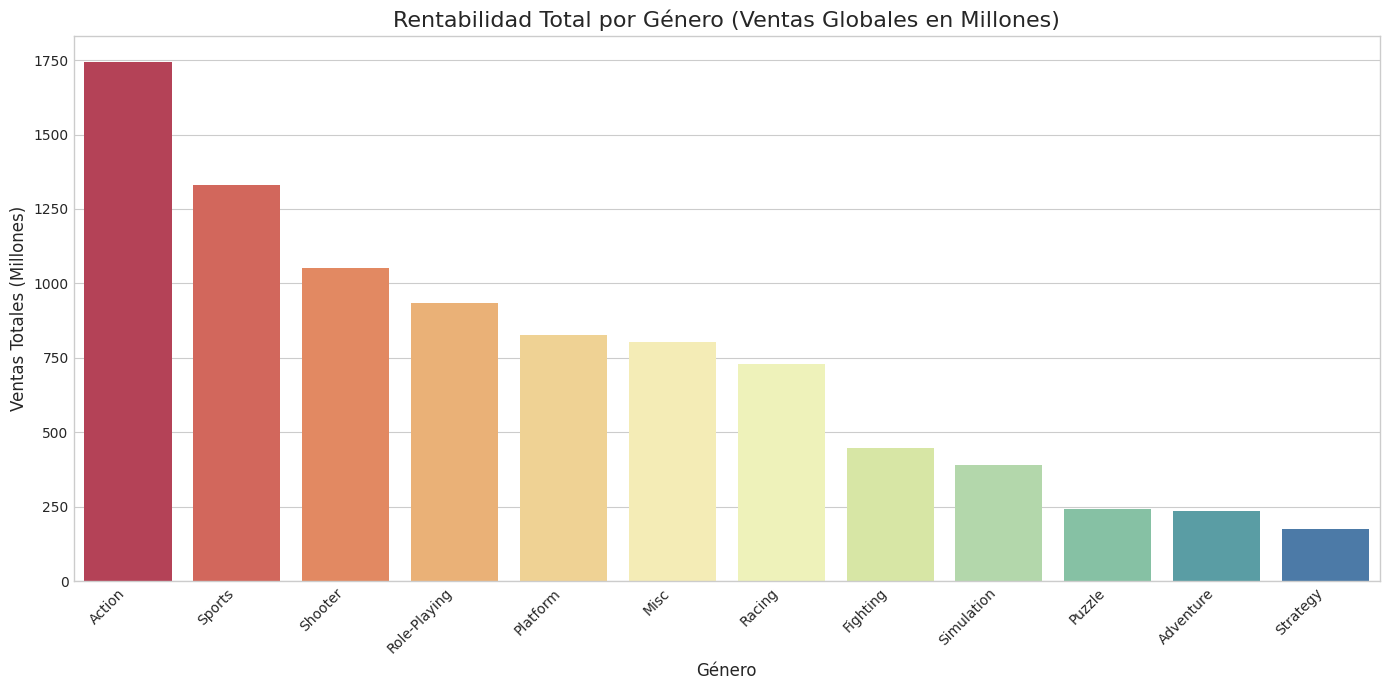

In [12]:
# 3.9. Echar un vistazo a la distribución general de los juegos por género para obserbar su rentabilidad.

# Agrupar por 'genre' y calcular la suma de 'total sales'
ventas_por_genero = df.groupby('genre')['total sales'].sum()

# Ordenar los géneros por ventas totales de forma descendente
ventas_por_genero_ordenadas = ventas_por_genero.sort_values(ascending=False)

# Generar el gráfico de barras
plt.figure(figsize=(14, 7))

sns.barplot(x=ventas_por_genero_ordenadas.index, y=ventas_por_genero_ordenadas.values, palette='Spectral')
plt.title('Rentabilidad Total por Género (Ventas Globales en Millones)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (Millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El gráfico muestra las ventas totales de títulos lanzados por género, lo cual indica dónde se concentra la inversión en desarrollo. Para responder sobre la rentabilidad, debemos comparar este volumen de lanzamientos con la capacidad de cada género para generar altos ingresos.

1. ¿Qué se puede decir de los géneros más rentables?
   Los géneros más rentables son aquellos que alcanzan las barras más altas, lo que indica el mayor volumen total de ingresos.

   - Action: El género Action es el más rentable con diferencia, alcanzando casi los 1750 millones de dólares en ventas totales. Esto se debe a que combina el mayor volumen de lanzamientos (como
     vimos en el gráfico de distribución) con la capacidad de generar las mayores ventas de la industria.
     
   - Ventas Masivas Garantizadas (Sports y Shooter): Sports y Shooter ocupan el segundo y tercer lugar, respectivamente.
  
     Sports (aprox. 1350M) debe su alta rentabilidad a las franquicias anuales muy populares que garantizan ventas consistentes y masivas.
  
     Shooter (aprox. 1050M) demuestra que, aunque tiene un volumen de lanzamientos menor que Acción, cada título tiende a ser más rentable en promedio, gracias a grandes franquicias como Call of
     Duty o Halo.
  
   - Platform: El género Platform se posiciona sorprendentemente alto (alrededor de 800M), a pesar de tener un volumen de títulos lanzado significativamente menor que Misc (Misceláneo). Esto
     sugiere que, en promedio, los juegos de Plataforma tienen un rendimiento de ventas por título excepcionalmente alto (generalmente impulsado por franquicias icónicas como Mario o Sonic).

2. ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

   Generalizaciones sobre Ventas Altas:
   - Dominio del Factor Humano (Action, Sports, Shooter): La rentabilidad máxima se concentra en géneros que ofrecen una experiencia de juego activa y competitiva. Los juegos con ventas más altas son aquellos
     que: a) se benefician de franquicias establecidas (Sports), o b) tienen un alto factor de rejugabilidad o multijugador (Action y Shooter).

   - Rentabilidad Desligada del Volumen (Platform): Los géneros como Platform, demuestran que no se necesita el mayor número de lanzamientos para ser un Top 5 en
     ventas. La calidad y el reconocimiento de marca superan el volumen.


Paso 4. Crea un perfil de usuario para cada región.

Top 5 Plataformas Más Rentables en Norteamérica (Ventas Totales en Millones):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na sales, dtype: float64


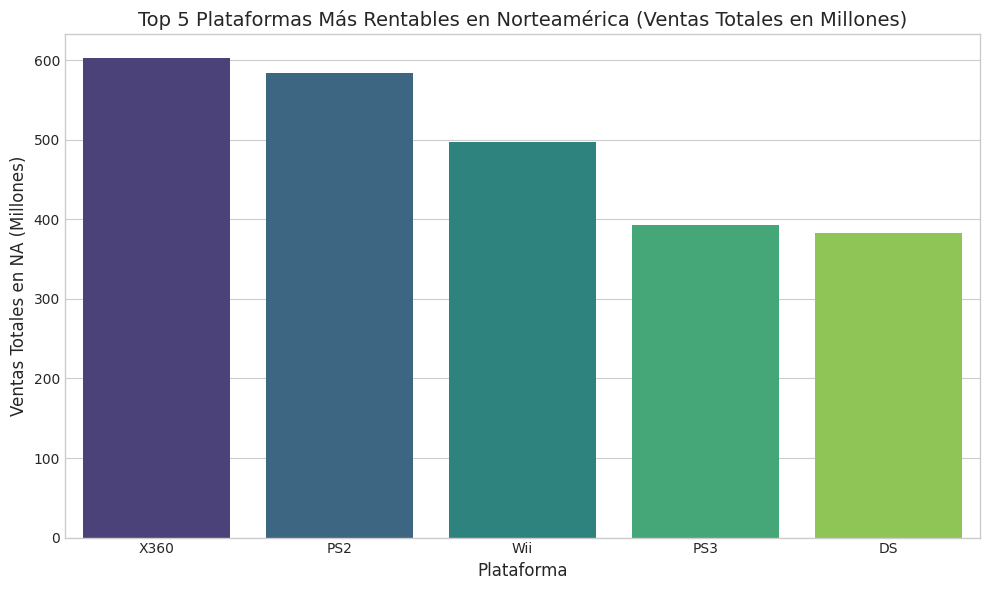

In [13]:
# 4.1. Crear gráfico para las plataformas más rentables en Norteamérica

# Agrupar por 'platform' y calcular la suma de ventas en la región NA
ventas_na_por_plataforma = df.groupby('platform')['na sales'].sum()

# Ordenar y seleccionar el Top 5 de plataformas en NA
top_5_na_ordenadas = ventas_na_por_plataforma.sort_values(ascending=False).head(5)

# Imprimir los resultados del Top 5
print("Top 5 Plataformas Más Rentables en Norteamérica (Ventas Totales en Millones):")
print(top_5_na_ordenadas)

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_na_ordenadas.index, y=top_5_na_ordenadas.values, palette='viridis')

# Añadir título y etiquetas
plt.title('Top 5 Plataformas Más Rentables en Norteamérica (Ventas Totales en Millones)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales en NA (Millones)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('top_5_plataformas_na.png')


Top 5 Plataformas Más Rentables en Europa (Ventas Totales en Millones):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu sales, dtype: float64


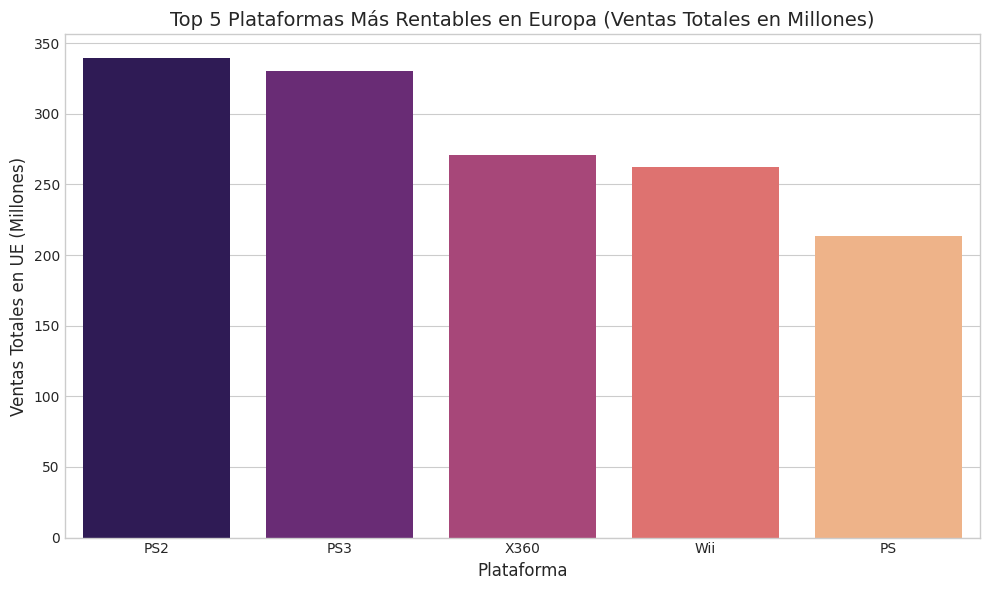

In [14]:
#4.1. Crear gráfico para las plataformas más rentables en Europa

# Agrupar por 'platform' y calcular la suma de ventas en la región UE
ventas_eu_por_plataforma = df.groupby('platform')['eu sales'].sum()

# Ordenar y seleccionar el Top 5 de plataformas en UE
top_5_eu_ordenadas = ventas_eu_por_plataforma.sort_values(ascending=False).head(5)

# Imprimir los resultados del Top 5
print("Top 5 Plataformas Más Rentables en Europa (Ventas Totales en Millones):")
print(top_5_eu_ordenadas)

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_eu_ordenadas.index, y=top_5_eu_ordenadas.values, palette='magma')
plt.title('Top 5 Plataformas Más Rentables en Europa (Ventas Totales en Millones)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales en UE (Millones)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Top 5 Plataformas Más Rentables en Japón (Ventas Totales en Millones):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp sales, dtype: float64


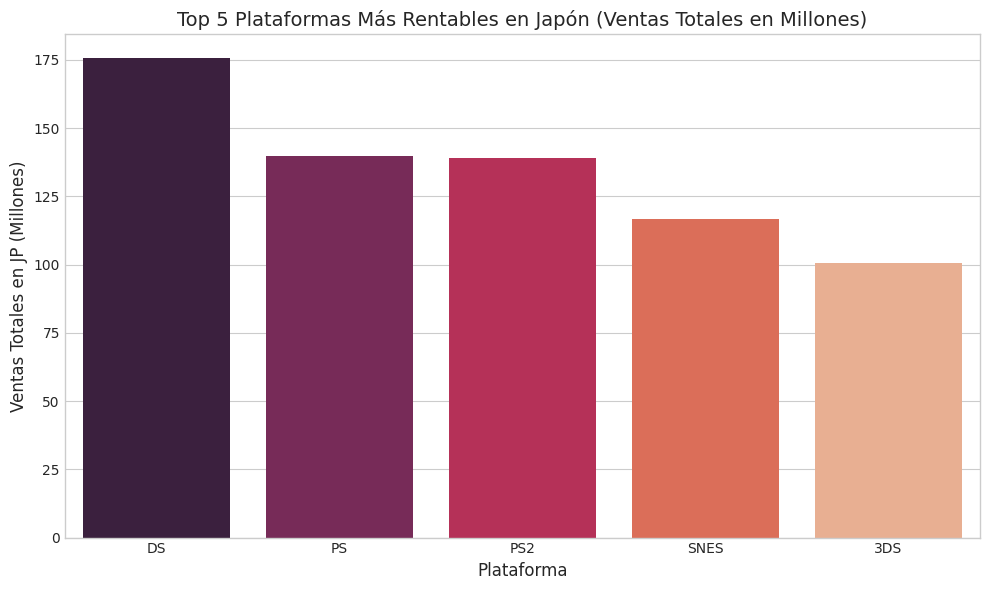

In [15]:
#4.1. Crear gráfico para las plataformas más rentables en Japón

# Agrupar por 'platform' y calcular la suma de ventas en la región JP
ventas_jp_por_plataforma = df.groupby('platform')['jp sales'].sum()

# Ordenar y seleccionar el Top 5 de plataformas en JP
top_5_jp_ordenadas = ventas_jp_por_plataforma.sort_values(ascending=False).head(5)

# Imprimir los resultados del Top 5
print("Top 5 Plataformas Más Rentables en Japón (Ventas Totales en Millones):")
print(top_5_jp_ordenadas)

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_jp_ordenadas.index, y=top_5_jp_ordenadas.values, palette='rocket')

# Añadir título y etiquetas
plt.title('Top 5 Plataformas Más Rentables en Japón (Ventas Totales en Millones)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales en JP (Millones)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Análisis Comparativo de Cuotas de Mercado Regionales.

El análisis de los datos revela patrones de consumo y preferencias culturales marcadamente diferentes en cada mercado, impactando directamente en la distribución de la rentabilidad de las plataformas.

1. 🇺🇸 Norteamérica (NA):
   El mercado de Norteamérica se caracteriza por una intensa competencia entre los líderes de la séptima generación y la
   longevidad de la generación anterior.

   - X360 (602.47 Ventas en millones): La X360 de Microsoft domina el mercado, estableciendo a NA como su principal base
     global. Su cuota de mercado supera significativamente a sus competidores.La X360 de Microsoft domina el mercado,
     estableciendo a NA como su principal base global. Su cuota de mercado supera significativamente a sus competidores.
     
   - PS2 (583.84 Ventas en millones): Mantiene una cuota extremadamente alta, demostrando que su legado y base instalada en
     NA fueron casi tan fuertes como el líder de la siguiente generación.
  
   - Wii (496.90 Ventas en millones): Éxito Masivo: Su tercera posición, con altas ventas, subraya la capacidad del mercado
     NA para adoptar innovaciones que atraen a audiencias casuales.
  
   Nota: Las ventas totales en NA son las más altas de las tres regiones, confirmando su posición como el mercado de
   videojuegos más grande del dataset.

2. 🇪🇺 Europa (UE):
   El mercado europeo muestra una fuerte lealtad a la marca Sony, lo que le otorga una ventaja competitiva sobre Microsoft,
   revirtiendo el orden de liderazgo observado en Norteamérica.

   - PS2 (339.29 Ventas en millones): La PS2 no solo lidera, sino que junto a la PS3, afianza la preferencia histórica de los
     consumidores europeos por la marca PlayStation.

   - PS3 (330.29 Ventas en millones): La PS3 supera a su rival generacional directo, la X360, consolidando su cuota de
     mercado y rentabilidad en la región.
  
   - X360 (270.76 Ventas en millones): La X360 cae a la tercera posición. Si bien tiene ventas considerables, su cuota de
     mercado en UE es notablemente menor a la de las plataformas de Sony.
  
   Nota: La PS2 y PS3 acumulan casi el doble de ventas que las consolas de Microsoft y Nintendo combinadas en este Top 5,
   indicando que la preferencia por el hardware de Sony fue el factor dominante en la distribución de la rentabilidad
   europea.

3. 🇯🇵 Japón (JP):
   El mercado japonés presenta las diferencias más extremas, mostrando un fuerte enfoque en el hardware portátil y una
   marcada preferencia por marcas nacionales.

   - DS (175.57 Ventas en millones): La DS es la líder indiscutible, confirmando la abrumadora preferencia japonesa por las
     consolas portátiles sobre las de sobremesa (una tendencia opuesta a NA y UE).
     
   - PS y PS2 (139.82 Ventas en millones): La PlayStation original aparece en el Top 5, señalando la fuerte importancia del
     legado y la nostalgia en la cuota de mercado japonesa.
  
   - SNES (116.55 Ventas en millones): La presencia de la SNES en el Top 5, una consola de los años 90, es única y demuestra
     que las ventas históricas de títulos first-party y el valor de las IPs locales son excepcionalmente altos.
  
   Nota: Los volúmenes de ventas totales en Japón son significativamente más bajos que en NA y UE. Además, el mercado está
   segmentado por Nintendo (DS, 3DS, SNES) y Sony (PS, PS2), mientras que Xbox ni siquiera figura en el Top 5, lo que implica
   una cuota de mercado insignificante para esa plataforma.

Conclusión: 
El análisis de datos de ventas confirma que las plataformas operan bajo diferentes dinámicas de rentabilidad en cada región:

- Plataforma Dominante:
  - X360 en NA: Preferencia por Hardware Americano
  - PS2 UE: Fuerte preferencia por Hardware Japonés
  - DS JP: Fuerte preferencia por Hardware Portátil

Esta marcada variación en las cuotas de mercado es esencial para cualquier toma de decisiones estratégica sobre la localización, marketing y desarrollo de software por plataforma y región.

Ventas Totales (en Millones) por Clasificación y Región:
                na sales  eu sales  jp sales
rating                                      
Sin Clasificar   1242.46    613.83    841.96
E                1292.99    710.25    198.11
T                 759.75    427.03    151.40
M                 748.48    483.97     64.24
E10+              353.32    188.52     40.20
K-A                 2.56      0.27      1.46
AO                  1.26      0.61      0.00
EC                  1.53      0.11      0.00
RP                  0.00      0.08      0.00


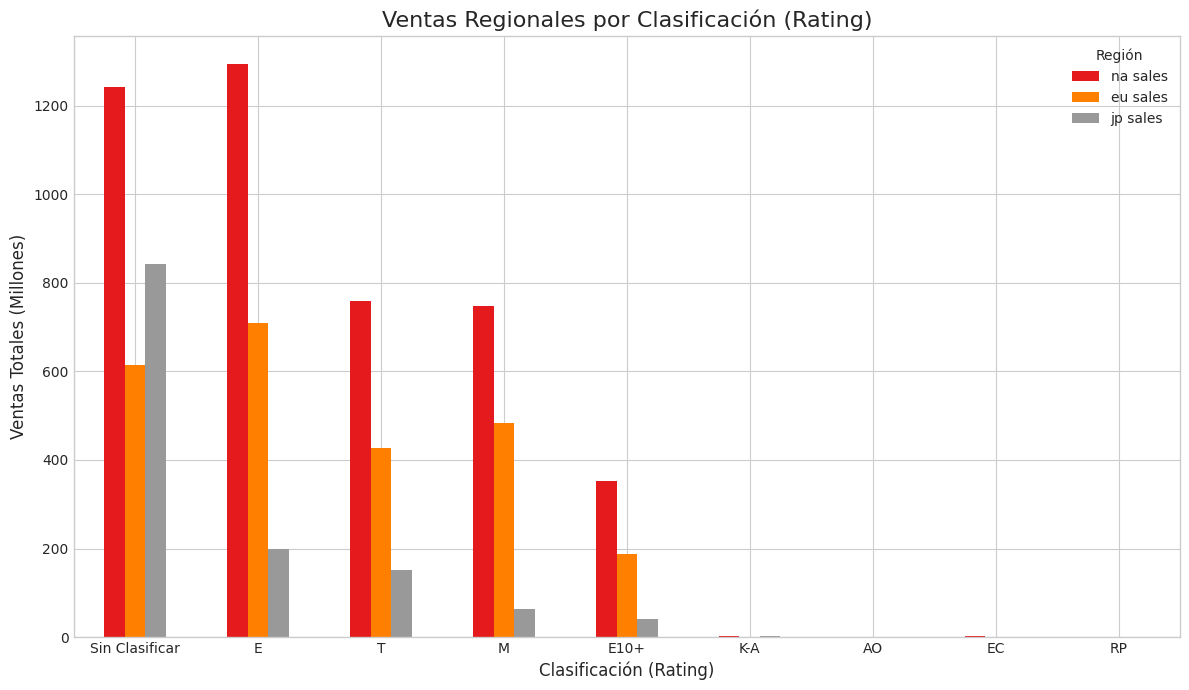

In [16]:
# 4.2. Observar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

# Rellenar los valores nulos de 'rating' con 'Sin Clasificar'
df['rating'] = df['rating'].fillna('Sin Clasificar')

# Definir las columnas de ventas
COLUMNAS_VENTAS = ['na sales', 'eu sales', 'jp sales']

# Cálcular la rentabilidad por clasificación y región
# Agrupar el DataFrame por 'rating' y sumar las ventas de las 3 regiones
ventas_por_rating_region = df.groupby('rating')[COLUMNAS_VENTAS].sum()

# Ordenar las filas por ventas totales globales para una mejor visualización
ventas_por_rating_region['Total Global'] = ventas_por_rating_region.sum(axis=1)
ventas_por_rating_region = ventas_por_rating_region.sort_values(by='Total Global', ascending=False).drop(columns=['Total Global'])

print("Ventas Totales (en Millones) por Clasificación y Región:")
print(ventas_por_rating_region)

# Crear gráfico de barras agrupadas

ventas_por_rating_region.plot(kind='bar', figsize=(12, 7), rot=0, cmap='Set1')
plt.title('Ventas Regionales por Clasificación (Rating)', fontsize=16)
plt.xlabel('Clasificación (Rating)', fontsize=12)
plt.ylabel('Ventas Totales (Millones)', fontsize=12)
plt.legend(title='Región', loc='upper right')
plt.tight_layout()
plt.show()

El análisis de ventas por clasificación de contenido revela una desigual distribución de la rentabilidad ligada a las preferencias demográficas y culturales de cada mercado. La clasificación no es solo una etiqueta de cumplimiento legal, sino un indicador clave de la segmentación del mercado y de las oportunidades comerciales.

1. Dominio de la Audiencia:
   
   - Liderazgo de 'E' (Everyone): La clasificación 'E' es la categoría más rentable a
     nivel global (2,201.35 millones), lo que subraya que los juegos para todas las
     edades son la base de ingresos más grande. Esto es coherente con el éxito masivo de
     plataformas como la Wii y franquicias de Nintendo, que dominan esta categoría.
     
   - Volumen No Clasificado: La alta cuota de ventas en la categoría 'Sin Clasificar'
     (2,608.25 millones) representa un sesgo histórico significativo en el dataset. Muchos
     de estos títulos son software antiguo, importaciones, o juegos que preceden a la
     adopción generalizada de la clasificación, lo que debe considerarse al interpretar el
     volumen total.

2. Clasificación 'M' (Mature):

   - Norteamérica (NA): La clasificación 'M' representa el segmento de mayor valor por
     juego. El alto volumen subraya la fuerte demanda de contenido de acción y shooter
     para adultos en NA, siendo un motor de crecimiento crítico para las consolas Xbox y
     PlayStation.

   - Europa (UE): Muestra una robusta demanda de contenido 'M', aunque en un volumen
     absoluto menor que NA. La cuota de mercado es comparable a la de NA, lo que indica
     la homogeneidad de las preferencias occidentales en este segmento.
  
   - Japón (JP): El mercado 'M' es marginal en comparación. Los títulos para adultos
     representan una cuota de ventas drásticamente menor, lo que confirma que el enfoque
     de desarrollo en Japón debe permanecer en las categorías 'E', 'T' y juegos no
     clasificados (principalmente debido a la dominancia del hardware portátil y géneros
     RPG/Aventura).
  

Conclusión:

1. Occidente (NA/UE): La categoría 'M' es una inversión estratégica de alta rentabilidad,
   justificando grandes presupuestos de desarrollo y marketing, especialmente en
   Norteamérica. Las categorías 'E' y 'T' aseguran la estabilidad financiera y el volumen
   masivo.

2. Japón (JP): El enfoque debe ser la adaptación cultural y el desarrollo para la
   categoría 'E' y 'T' (o equivalentes CERO), priorizando la experiencia portátil o los
   nichos de legado. Invertir en títulos 'M' dirigidos a JP con expectativas de ventas
   occidentales es un riesgo financiero significativo.

Paso 5. Prueba las siguientes hipótesis:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

5.1. Formulación de hipótesis para: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipótesis Nula (H0): Las medias de las calificaciones de usuario son iguales.
- Hipótesis Alternativa (Ha): Las medias de las calificaciones de usuario son diferentes.

In [17]:
# Probar la hiótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

# Limpiar y convertir la columna 'user score' a numérica.
# Remplazamos el valor 'tbd' (To Be Determined) por NaN
df['user score'] = df['user score'].replace('tbd', np.nan)
df['user score'] = pd.to_numeric(df['user score'], errors='coerce')

# Filtrar las muestras
xone_scores = df[df['platform'] == 'XOne']['user score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user score'].dropna()

# 3. Mostrar las estadísticas descriptivas para comparación
print("--- Estadísticas Descriptivas ---")
print(f"Media XOne: {xone_scores.mean():.3f} (n={len(xone_scores)})")
print(f"Media PC: {pc_scores.mean():.3f} (n={len(pc_scores)})")
print("-" * 35)

#Ejecución del Test t
statistic, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"Estadístico t: {statistic:.4f}")
print(f"Valor p (P-Value): {p_value:.4f}")

--- Estadísticas Descriptivas ---
Media XOne: 6.521 (n=182)
Media PC: 7.062 (n=770)
-----------------------------------
Estadístico t: -4.6534
Valor p (P-Value): 0.0000


Análisis Estadístico de la Hipótesis.

Inicialmente, observamos una diferencia en las medias muestrales: la plataforma PC tiene una calificación promedio de usuario más alta por 0.541 puntos. Sin embargo, esta diferencia debe ser validada estadísticamente.

Interpretación del Test t y el Valor p (Estadístico t: -4.6534):

- Este valor indica que la diferencia observada entre las medias muestrales es aproximadamente 4.65 desviaciones estándar lejos de cero (la diferencia asumida bajo la hipótesis nula). El signo negativo solo indica que la media de la primera muestra (XOne) es menor que la segunda (PC). Es una diferencia grande.

- Valor p(P-Value): 0.0000
  El valor p es la probabilidad de observar una diferencia en las medias tan extrema o
  más extrema que 0.541 si, en realidad, las medias de las poblaciones fueran iguales.

Decisión Estadística:

- Nivel de Significación (alfa): Se utilizó el nivel estándar de alfa = 0.05.
- Comparación: El Valor p (0.0000) es mucho menor que alfa (0.05).

Dado que p < 0.05, rechazamos la Hipótesis Nula (H0).

Conclusión:

Existe evidencia estadística suficiente para rechazar la hipótesis nula que establece que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. La diferencia observada de 0.541 puntos es estadísticamente significativa.

Podemos concluir con un alto nivel de confianza que, en el dataset analizado, la percepción de los usuarios es más favorable hacia los videojuegos de PC que hacia los de Xbox One.

5.2. Formulación de hipótesis para: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipótesis Nula (H0): Las medias de las calificaciones de usuario para ambos géneros son
  iguales.
- Hipótesis Alternativa (Ha): Las medias de las calificaciones de usuario para ambos
  géneros son diferentes.


In [18]:
# Probar la hiótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Filtrar las muestras para cada género
action_scores = df[df['genre'] == 'Action']['user score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user score'].dropna()

# Mostrar las estadísticas descriptivas para comparación
print("--- Estadísticas Descriptivas ---")
print(f"Media Acción: {action_scores.mean():.3f} (n={len(action_scores)})")
print(f"Media Deportes: {sports_scores.mean():.3f} (n={len(sports_scores)})")
print("-" * 35)

# Ejecución del Test t
statistic, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"Estadístico t: {statistic:.4f}")
print(f"Valor p (P-Value): {p_value:.4f}")

--- Estadísticas Descriptivas ---
Media Acción: 7.054 (n=1830)
Media Deportes: 6.961 (n=1103)
-----------------------------------
Estadístico t: 1.5775
Valor p (P-Value): 0.1148


Análisis Estadístico de la Hipótesis.

Inicialmente, observamos una ligera diferencia positiva: la media de Acción es 0.093 puntos más alta que la media de Deportes. El test t nos dirá si esta pequeña diferencia es lo suficientemente grande como para ser considerada real y no solo un efecto del muestreo aleatorio.

Interpretación del Test t y el Valor p (Estadístico t: 1.5775):
Este valor indica que las medias están separadas por un margen relativamente pequeño en términos de desviación estándar.

Decisión Estadística:
Nivel de Significación (alfa): Se utilizó el nivel estándar de alfa = 0.05 (5%).
Dado que p > 0.05, no rechazamos la Hipótesis Nula (H0).

Conclusión:
No existe evidencia estadística suficiente para rechazar la hipótesis nula.
Podemos concluir que, aunque la media muestral de Acción (7.054) fue ligeramente superior a la de Deportes (6.961), esta diferencia de 0.093 puntos no es estadísticamente significativa. Es probable que la pequeña variación observada se deba simplemente al azar o a la variabilidad de la muestra, y no a una diferencia inherente en las calificaciones promedio poblacionales de los usuarios para ambos géneros.

- Percepción de Calidad Equivalente: Los usuarios de videojuegos perciben la calidad
  general de los títulos de Acción y Deportes de forma muy similar. No se debe asignar
  una superioridad inherente a un género sobre el otro basándose en las calificaciones
  promedio del usuario.


Se utilizaron las hipótesis nulas y alternativas pra poder hacer una comparativa de los resultados más facil ya que si los resultados de las hipótesis nulas no son iguales podemos rechazarlas y si los resultados de las hipótesis alternativas son diferentes podemos aceptarlas y de esta manera poder hacer un análisis de los resultados más fácil.

Paso 6. Escribe una conclusión general.

El éxito en la industria del videojuego no se basa en un aumento lineal de la producción, sino en la capacidad de generar outliers en mercados regionales con preferencias específicas. La PC y las consolas operan bajo lógicas de vida útil opuestas, y aunque las audiencias tienen gustos similares en los géneros dominantes (Acción y Deportes), la calidad percibida de los títulos de PC supera consistentemente a la de los ports de Xbox One, un factor crucial para la estrategia de desarrollo futuro.

Predicciones de Tendencias del Mercado de Videojuegos para 2017.

La tendencia principal para 2017 sería la continuación de la contracción en el volumen de lanzamientos, manteniendo la tendencia post-2009 debido a los crecientes costos de desarrollo AAA. A pesar de la menor cantidad de títulos, la rentabilidad total se mantendría alta, ya que se predeciría el pico de ventas de la octava generación (PS4/XOne), asegurando una base instalada máxima para consumir los blockbusters principales.

Las ventas estarían fuertemente impulsadas por los títulos clasificados 'M' (Mature) en Norteamérica y Europa, confirmando el modelo de alto riesgo/alta recompensa. Además, la presión por la calidad del hardware se intensificaría, impulsada por la diferencia de calificaciones a favor de la PC, lo que obligaría a los desarrolladores a optimizar mejor los títulos multiplataforma para cerrar la brecha en la percepción de los usuarios.